$$\require{mhchem}$$       

- You are welcome to turn in work for the mechanism derivation on a separate sheet of paper for a small penalty (2 pt). Please do so by taking a photo of the pages and uploading them to the same Box folder.  Also hand in the physical sheet of paper.
- Label the x/y axis of graphs (and legend if appropriate)
- Comment your code so we understand what you're doing
- 'print' your identified solutions / fitted constants with units

# Reverse water gas shift catalysis

The reverse water gas shift reaction (rWGS) has been proposed as a way of turning waste CO$_2$ into carbon monoxide, which can be further hydrogenated to liquid fuels.  This reaction is as follows in the gas phase:
\begin{align}
\ce{CO2 + H2 <=> CO + H2O}
\end{align}
The reverse water gas shift reaction is usually conducted on CuO/ZnO catalysts supported by alumina, but a group in literature suggested that a TiO$_2$ supported Pt catalyst might be more active.  You're going to help them estimate a reduced mechanism for this catalytic reaction.

##  [20 pt] The authors propose the following associative elementary reaction mechanism: 
\begin{align*}
\ce{CO2(g) + S &<=>[K_{1}] CO2*S}\\
\ce{H2(g) + S &<=>[K_{2}] H2\cdot S}\\
\ce{CO2\cdot S + H2 \cdot S &<=>[K_{eq}] CO\cdot S + H2O \cdot S}\\
\ce{CO \cdot S &<=>[K_{4}] CO(g) + S}\\
\ce{H2O \cdot S &<=>[K_{5}] H2O(g) + S}
\end{align*}
Assuming that the third step ($\ce{CO2\cdot S + H2 \cdot S <=> CO\cdot S + H2O \cdot S\:}$) is rate limiting, derive the apparent reaction rate law for the this mechanism at short time conditions, where $[CO]$, $[H_2O]$, $[CO\cdot S]$, and $[H_2O\cdot S]$ are all ~0.  This is a heterogeneous catalytic process, so the total number of surface sites is conserved.

\begin{align*}
\ce{K_{1} = CO2*S / (CO2(g) \times S)}\\
\ce{K_{2} = H2\cdot S / (H2(g) \times S)}\\
\ce{S0 = S + H2 \cdot S + CO2\cdot S +  CO\cdot S + H2O \cdot S}\\
\ce{As CO \cdot S and  H2O \cdot S -> 0:}\\
\ce{S0 = S + H2 \cdot S + CO2\cdot S}\\
\ce{S0 = S + [K_{2}]H2 \times S +[K_{1}] CO2 \times S}\\
\ce{S = S0 / (1 + [K_{2}]H2 \times S +[K_{1}] CO2 \times S)}\\
\ce{r = Keq K1 K2 H2 So^2 CO2 / (1 + K_{2} H2(g) + K_{1} CO2)^2}
\end{align*}

## [20 pt] We can assume simplified Langmuir Hinshelwood kinetics of the form: 
\begin{align*}
r=\frac{kP_{CO2}P_{H_2}}{(1+K_1P_{CO2}+K_2P_{H_2})^2}
\end{align*}
where $K_1$ is already known from other studies:  0.07/atm. Use this simplified Langmuir Hinshelwood rate law to fit values of $k$ and $K_2$ for the following data:

| $P_{CO_2}$[atm] | $P_{H_2}$[atm] | Rate [mol/h/gcat] |
|----------:|---------:|------------------:|
|       0.9 |     0.18 |              0.037 |
|       0.9 |     0.42 |              0.045 |
|       0.9 |      0.6 |              0.046 |
|       0.9 |     0.85 |              0.051 |
|       0.9 |     0.92 |             0.0525 |
In addition to finding $k,K_2$, also plot your fit with the data.

Value of k = 0.370 mol/h/atm^2 /gcat and K2 = 1.554 /atm.


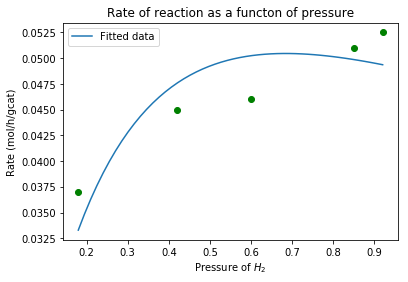

In [30]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

K1 = 0.07  # /atm
PC = 0.9
PH = np.array([0.18,0.42,0.6,0.85,0.92])
Ra = np.array([0.037,0.045,0.046,0.051,0.0525])

def rate(pars, PH):
    k, K2 = pars
    r = (k * PH *PC)/ (1 + K1*PC + K2*PH)**2
    return r

def sse(pars):
    k, K2 = pars
    sse = 0.5 * (Ra - rate(pars, PH))**2
    SSE = np.sum(sse)
    return SSE

ans = minimize(sse, np.array([1,0.02]))
k, K2 = ans.x

print(f'Value of k = {k:1.3f} mol/h/atm^2 /gcat and K2 = {K2:1.3f} /atm.')
PHs = np.linspace(min(PH),max(PH))
plt.plot(PH, Ra, 'go')
plt.plot(PHs, rate(ans.x, PHs), label = 'Fitted data')
plt.title('Rate of reaction as a functon of pressure')
plt.xlabel('Pressure of $H_2$')
plt.ylabel('Rate (mol/h/gcat)')
plt.legend()
plt.show()